# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.


Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [32]:
!pip install imbalanced-learn

In [33]:
#importing Train dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

# Explore data

In [34]:
# Let check the shape

df.shape

(31647, 18)

In [35]:
df.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [36]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [37]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [38]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

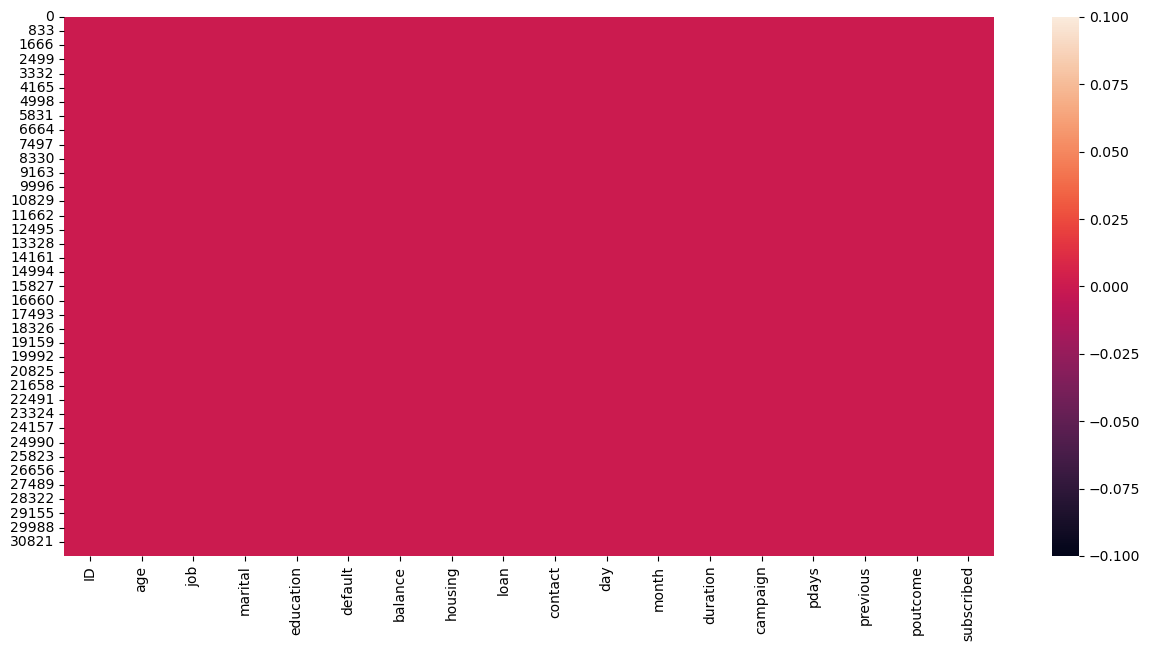

In [39]:
#lets visualize it using heatmap

sns.heatmap(df.isnull())

In [40]:
print(f"The rows and columns in the dataset:{df.shape}")
print(f"\nThe column headers in the dataset:{df.columns}")

The rows and columns in the dataset:(31647, 18)

The column headers in the dataset:Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [41]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [42]:
# we will drop the default column since it doesn't contribute much in the prediction of subscribed customers

df= df.drop('default',axis=True)

In [43]:
df.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

This gives the statistical information of the numerical columns. 

From the above description we can observe the following:

1. The counts of all the columns are same which means there are no missing values in the data set. 

2. The mean value is greater than the median(50%) in all columns except day column which means the data is skewed to right in these column.

3. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

4. We can also notice the Standard deviation, min 25% values from the described method. 

The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

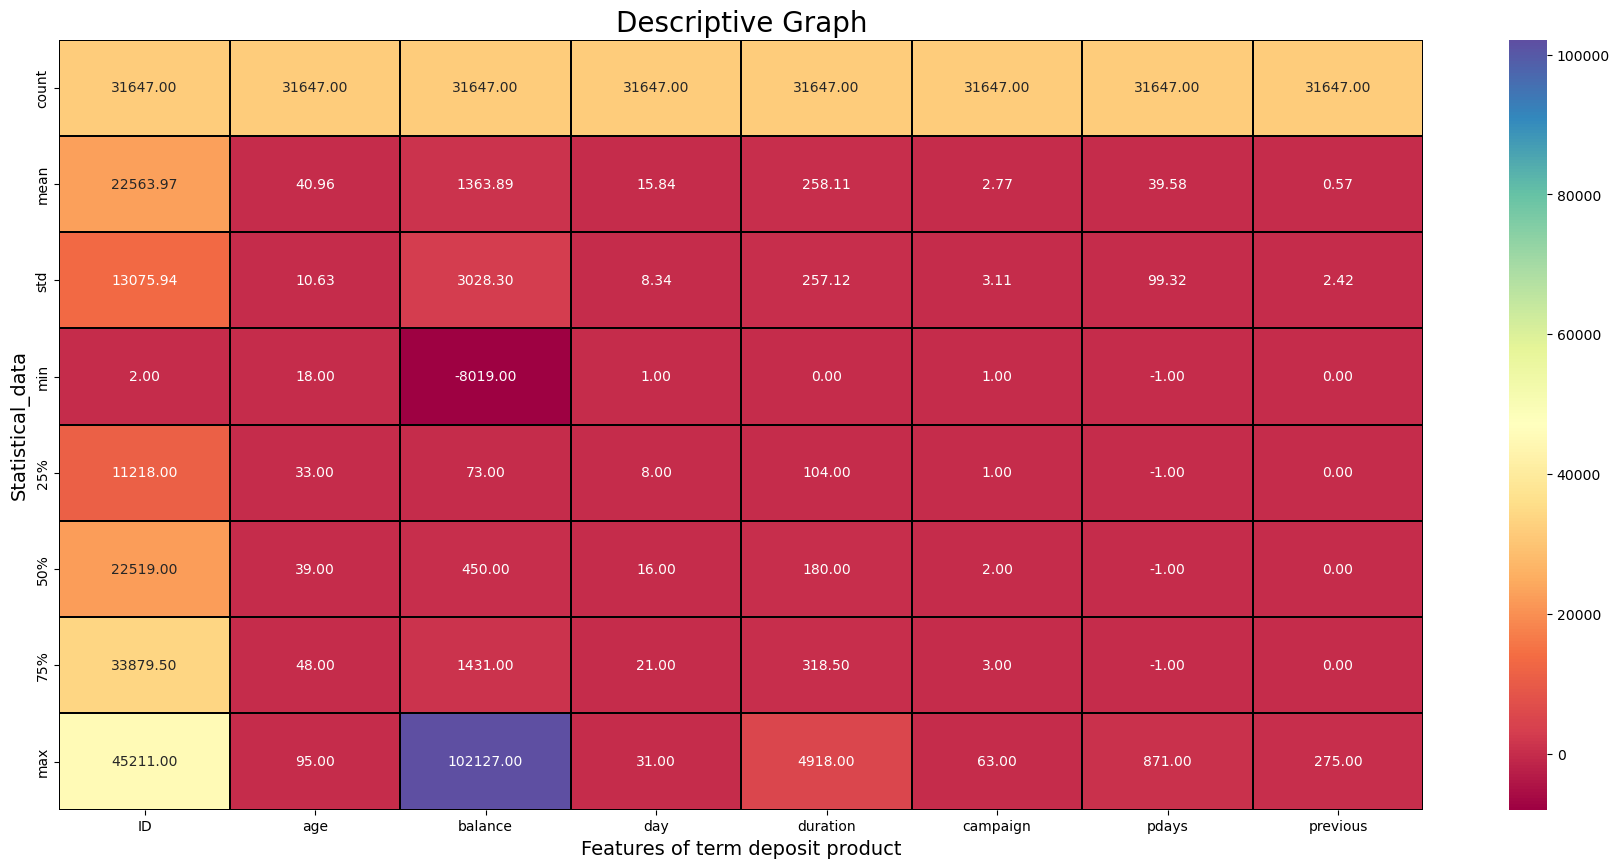

In [44]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features of term deposit product',fontsize=14)
plt.ylabel('Statistical_data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


In [45]:
# One-hot encoding a single column

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['contact']])
print(transformed.toarray())

df['contact']

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


0        telephone
1         cellular
2         cellular
3         cellular
4         cellular
           ...    
31642     cellular
31643     cellular
31644     cellular
31645    telephone
31646     cellular
Name: contact, Length: 31647, dtype: object

In [46]:
# One-hot encoding a single column

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['poutcome']])
print(transformed.toarray())

df['poutcome']

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


0        unknown
1        unknown
2        unknown
3        success
4        unknown
          ...   
31642    unknown
31643    unknown
31644    unknown
31645    failure
31646    unknown
Name: poutcome, Length: 31647, dtype: object

#  Data Visualization 

In [48]:
df.corr()

ID       age   balance       day  duration  campaign  \
ID        1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age       0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance   0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day      -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration  0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays     0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous  0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   

             pdays  previous  
ID        0.436148  0.254476  
age      -0.021947  0.005761  
balance   0.001789  0.013843  
day      -0.087626 -0.048752  
duration  0.000529  0.001783  
campaign -0.087570 -0.033151  
pdays     1.000000  0.428938  
previous  0.428938  1.000000

<AxesSubplot:>

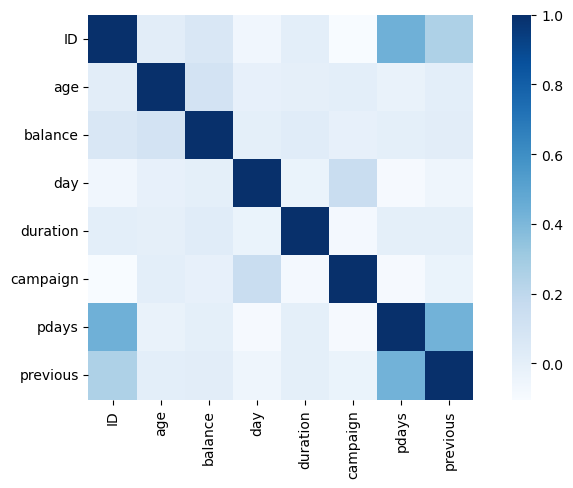

In [49]:
#Correlation Map

cor = df.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),
           cmap="Blues",square=True, ax= ax)

no     27932
yes     3715
Name: subscribed, dtype: int64


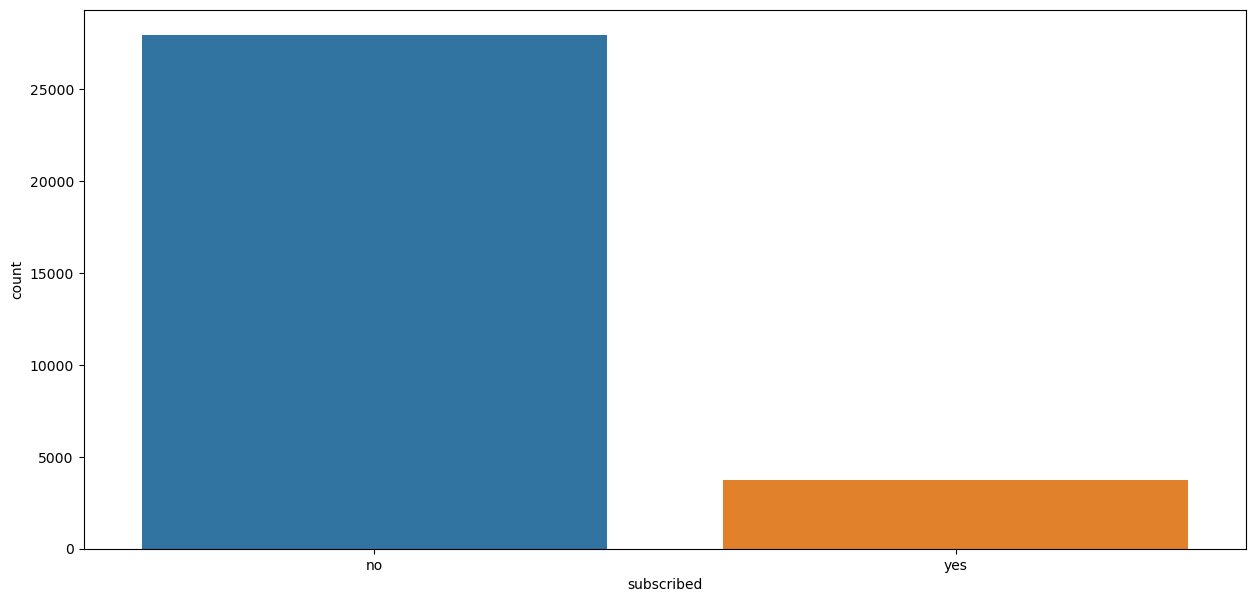

In [50]:
#visualize the number of subscribed column

ax=sns.countplot(x= 'subscribed',data=df)
print(df['subscribed'].value_counts())


cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


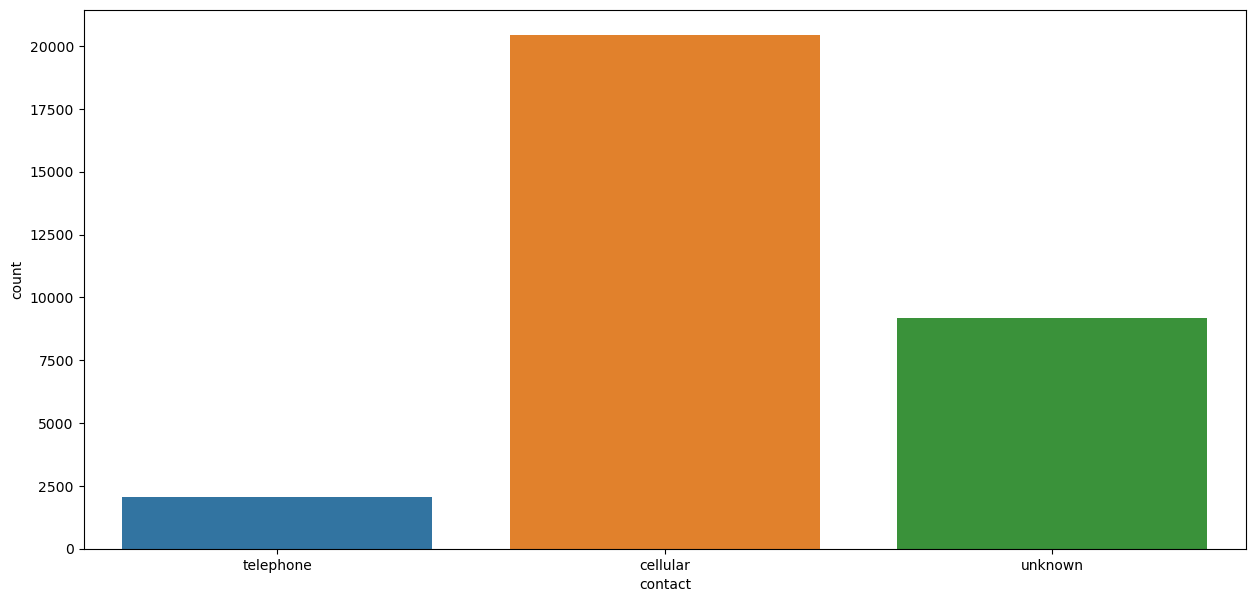

In [51]:
#visualize the number of contact column

ax=sns.countplot(x= 'contact',data=df)
print(df['contact'].value_counts())

Text(0, 0.5, 'subscribed')

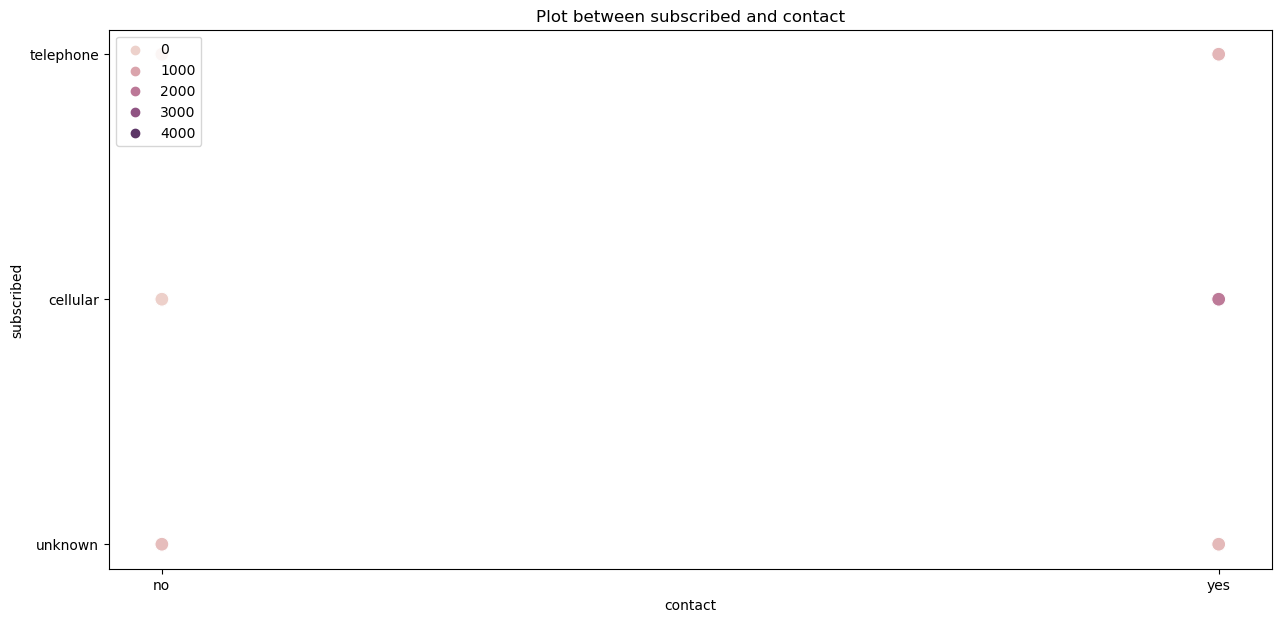

In [52]:
#Lets check the customer got contacted and subscribed

plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between subscribed and contact')
sns.scatterplot(data=df,x= "subscribed",y= "contact",hue="duration",s=(100));
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('contact')
plt.ylabel('subscribed')

In [53]:
#Encoding categorical columns using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df    

ID  age   job  marital  education  balance  housing  loan  contact  \
0      26110   56   0.0      1.0        3.0     1933      0.0   0.0      1.0   
1      40576   31  11.0      1.0        1.0        3      0.0   0.0      0.0   
2      15320   27   7.0      1.0        1.0      891      1.0   0.0      0.0   
3      43962   57   4.0      0.0        2.0     3287      0.0   0.0      0.0   
4      29842   31   9.0      1.0        1.0      119      1.0   0.0      0.0   
...      ...  ...   ...      ...        ...      ...      ...   ...      ...   
31642  36483   29   4.0      2.0        2.0        0      1.0   0.0      0.0   
31643  40178   53   4.0      0.0        2.0      380      0.0   1.0      0.0   
31644  19710   32   4.0      2.0        2.0      312      0.0   0.0      0.0   
31645  38556   57   9.0      1.0        1.0      225      1.0   0.0      1.0   
31646  14156   55   4.0      0.0        1.0      204      1.0   0.0      0.0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0       19    9.0        44         2     -1         0       3.0         0.0  
1       20    5.0        91         2     -1         0       3.0         0.0  
2       18    5.0       240         1     -1         0       3.0         0.0  
3       22    6.0       867         1     84         3       2.0         1.0  
4        4    3.0       380         1     -1         0       3.0         0.0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31642   12    8.0       116         2     -1         0       3.0         0.0  
31643    5    6.0       438         2     -1         0       3.0         1.0  
31644    7    1.0        37         3     -1         0       3.0         0.0  
31645   15    8.0        22         7    337        12       0.0         0.0  
31646   11    5.0      1973         2     -1         0       3.0         1.0  

[31647 rows x 17 columns]

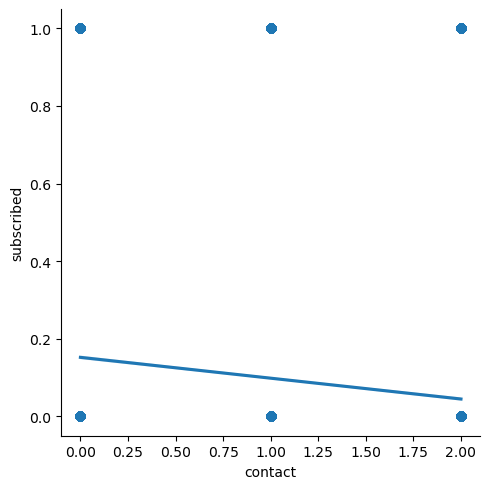

In [54]:
#to plot data and regression model fits across 

sns.lmplot(x='contact',y='subscribed',data=df,palette='colorblind')

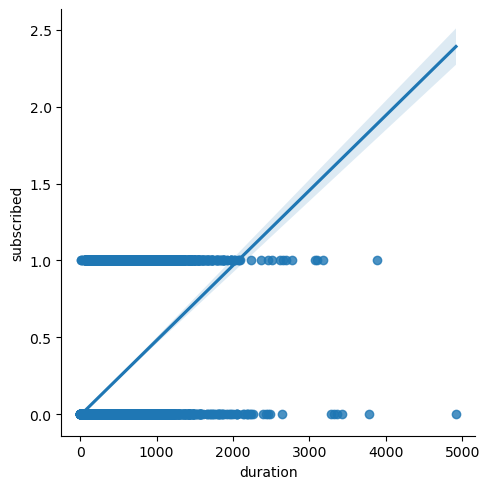

In [55]:
sns.lmplot(x='duration',y='subscribed',data=df,palette='colorblind')

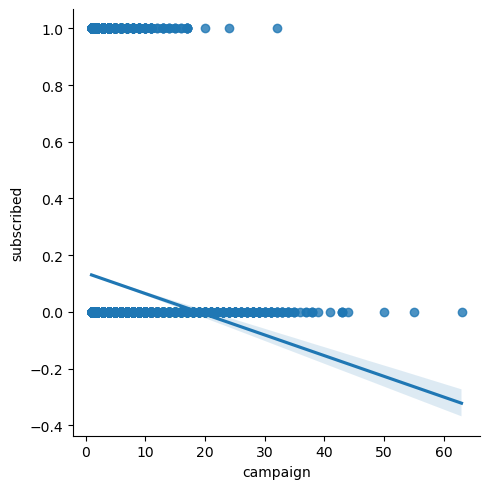

In [56]:
sns.lmplot(x='campaign',y='subscribed',data=df,palette='colorblind')

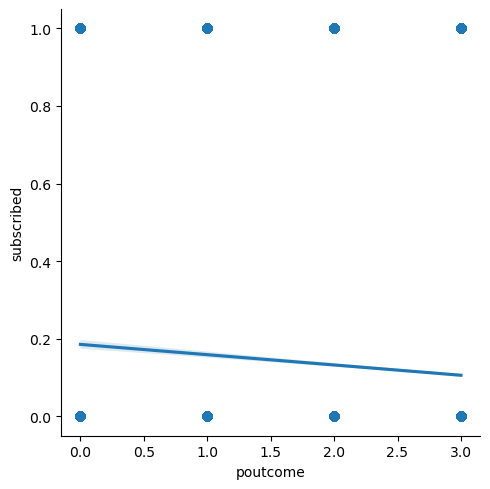

In [57]:
sns.lmplot(x='poutcome',y='subscribed',data=df,palette='colorblind')

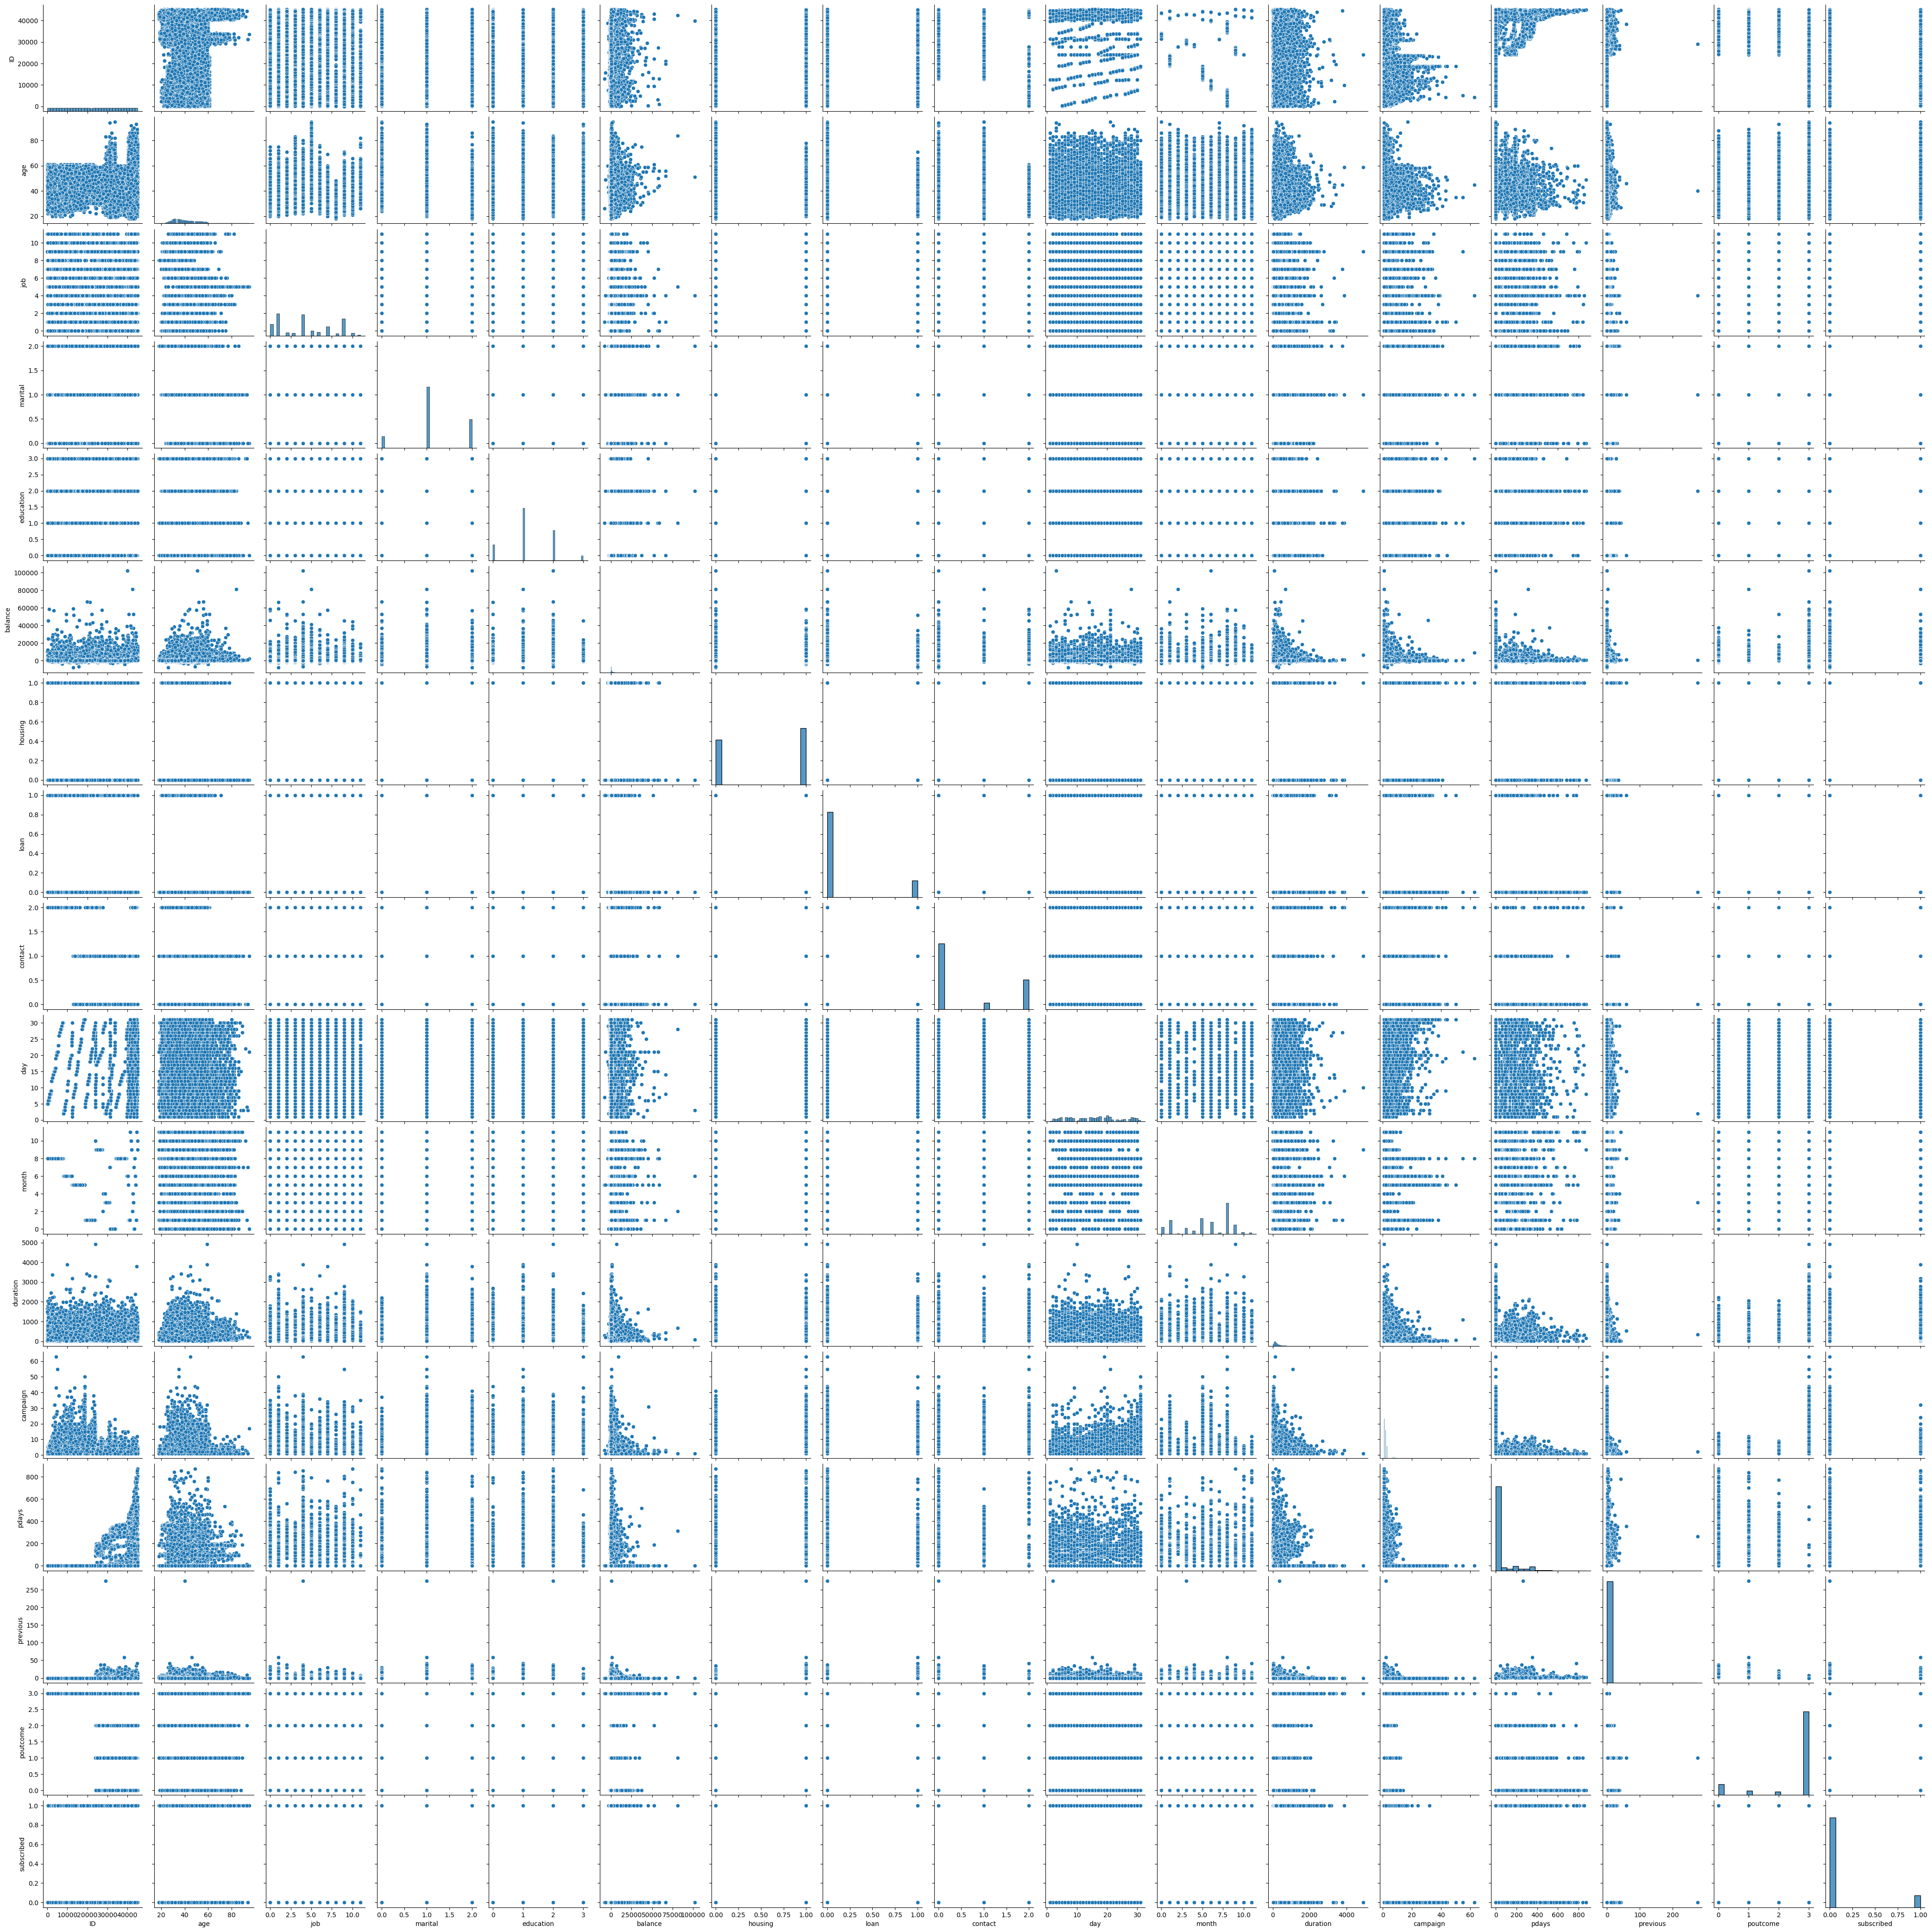

In [59]:
sns.pairplot(df)

In [60]:
df['subscribed']

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
31642    0.0
31643    1.0
31644    0.0
31645    0.0
31646    1.0
Name: subscribed, Length: 31647, dtype: float64

<AxesSubplot:xlabel='poutcome', ylabel='subscribed'>

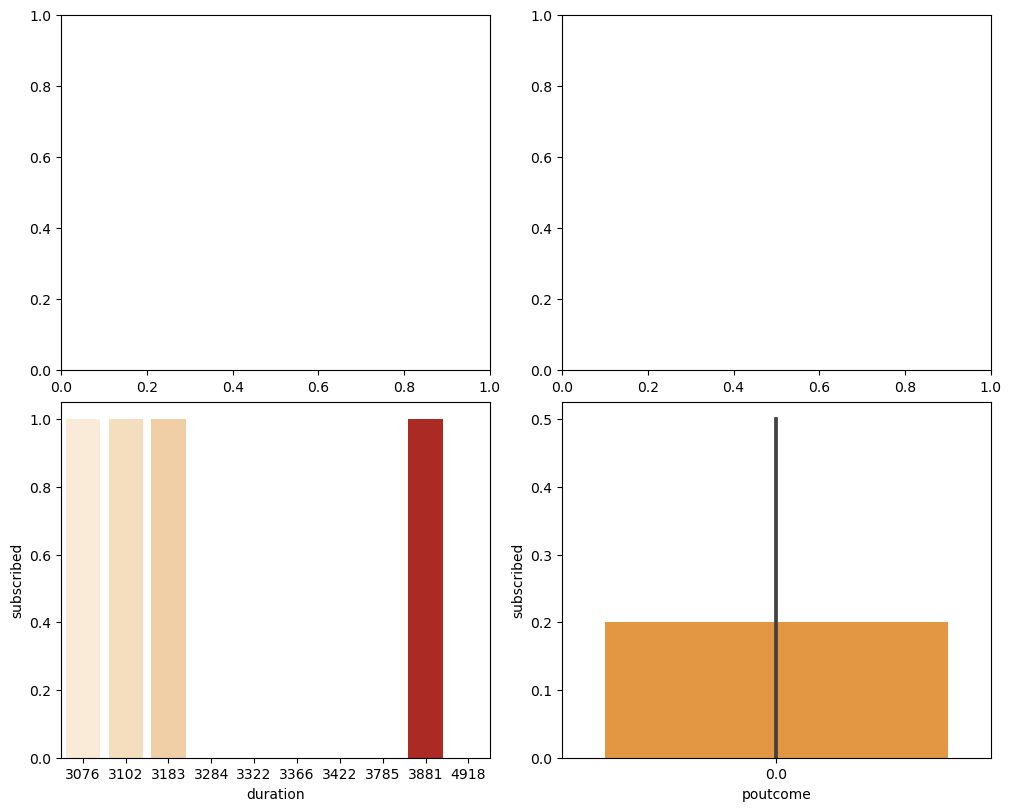

In [64]:
#Now lets use bar graph to check each country with Economy GDP, Generosity, Health, Freedom and Government Trust, Dystopic Residual 


fig, ax1 = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(10,8))

sns.barplot(x='duration' ,y='subscribed',data=df.nlargest(10,'duration'),ax=ax1[1,0],palette='OrRd')

sns.barplot(x='poutcome' ,y='subscribed',data=df.nsmallest(10,'poutcome'),ax=ax1[1,1],palette='YlOrBr')



## Checking for Outlier

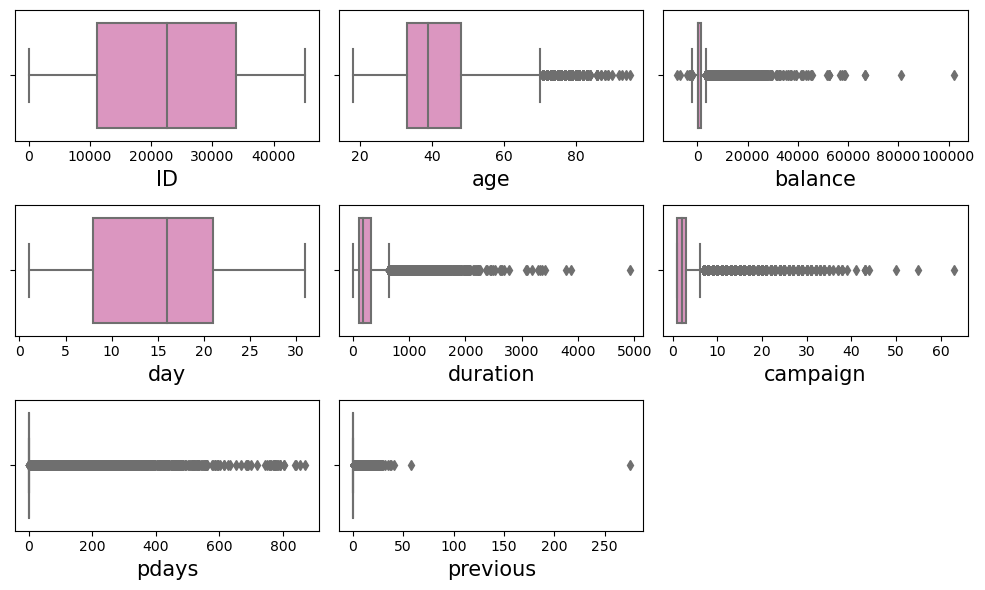

In [65]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [66]:
# Removing the outliers using zscore and IQR techniques before building the models and selected best one. 

from scipy.stats import zscore
out_features=df[['age','balance','duration','campaign','previous','pdays']]
z=np.abs(zscore(out_features))
z

age   balance  duration  campaign  previous     pdays
0      1.415793  0.187933  0.832754  0.245906  0.237059  0.408555
1      0.937156  0.449397  0.649957  0.245906  0.237059  0.408555
2      1.313627  0.156159  0.070449  0.567059  0.237059  0.408555
3      1.509911  0.635055  2.368149  0.567059  1.001336  0.447299
4      0.937156  0.411091  0.474054  0.567059  0.237059  0.408555
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.552724  0.245906  0.237059  0.408555
31643  1.133439  0.324903  0.699635  0.245906  0.237059  0.408555
31644  0.843038  0.347358  0.859979  0.075247  0.237059  0.408555
31645  1.509911  0.376088  0.918319  1.359859  4.716521  2.994723
31646  1.321675  0.383022  6.669728  0.245906  0.237059  0.408555

[31647 rows x 6 columns]

In [67]:
#threshold =3
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([3, 1, 5, ..., 5, 4, 2], dtype=int64))

In [68]:
df1=df[(z<3).all(axis=1)]
df1.shape

(28124, 17)

In [69]:
#shape of old and new dataframe

print("old data frame",df.shape[0])
print("new data frame",df1.shape[0])

old data frame 31647
new data frame 28124


In [70]:
print("Data loss percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage 11.132176825607482


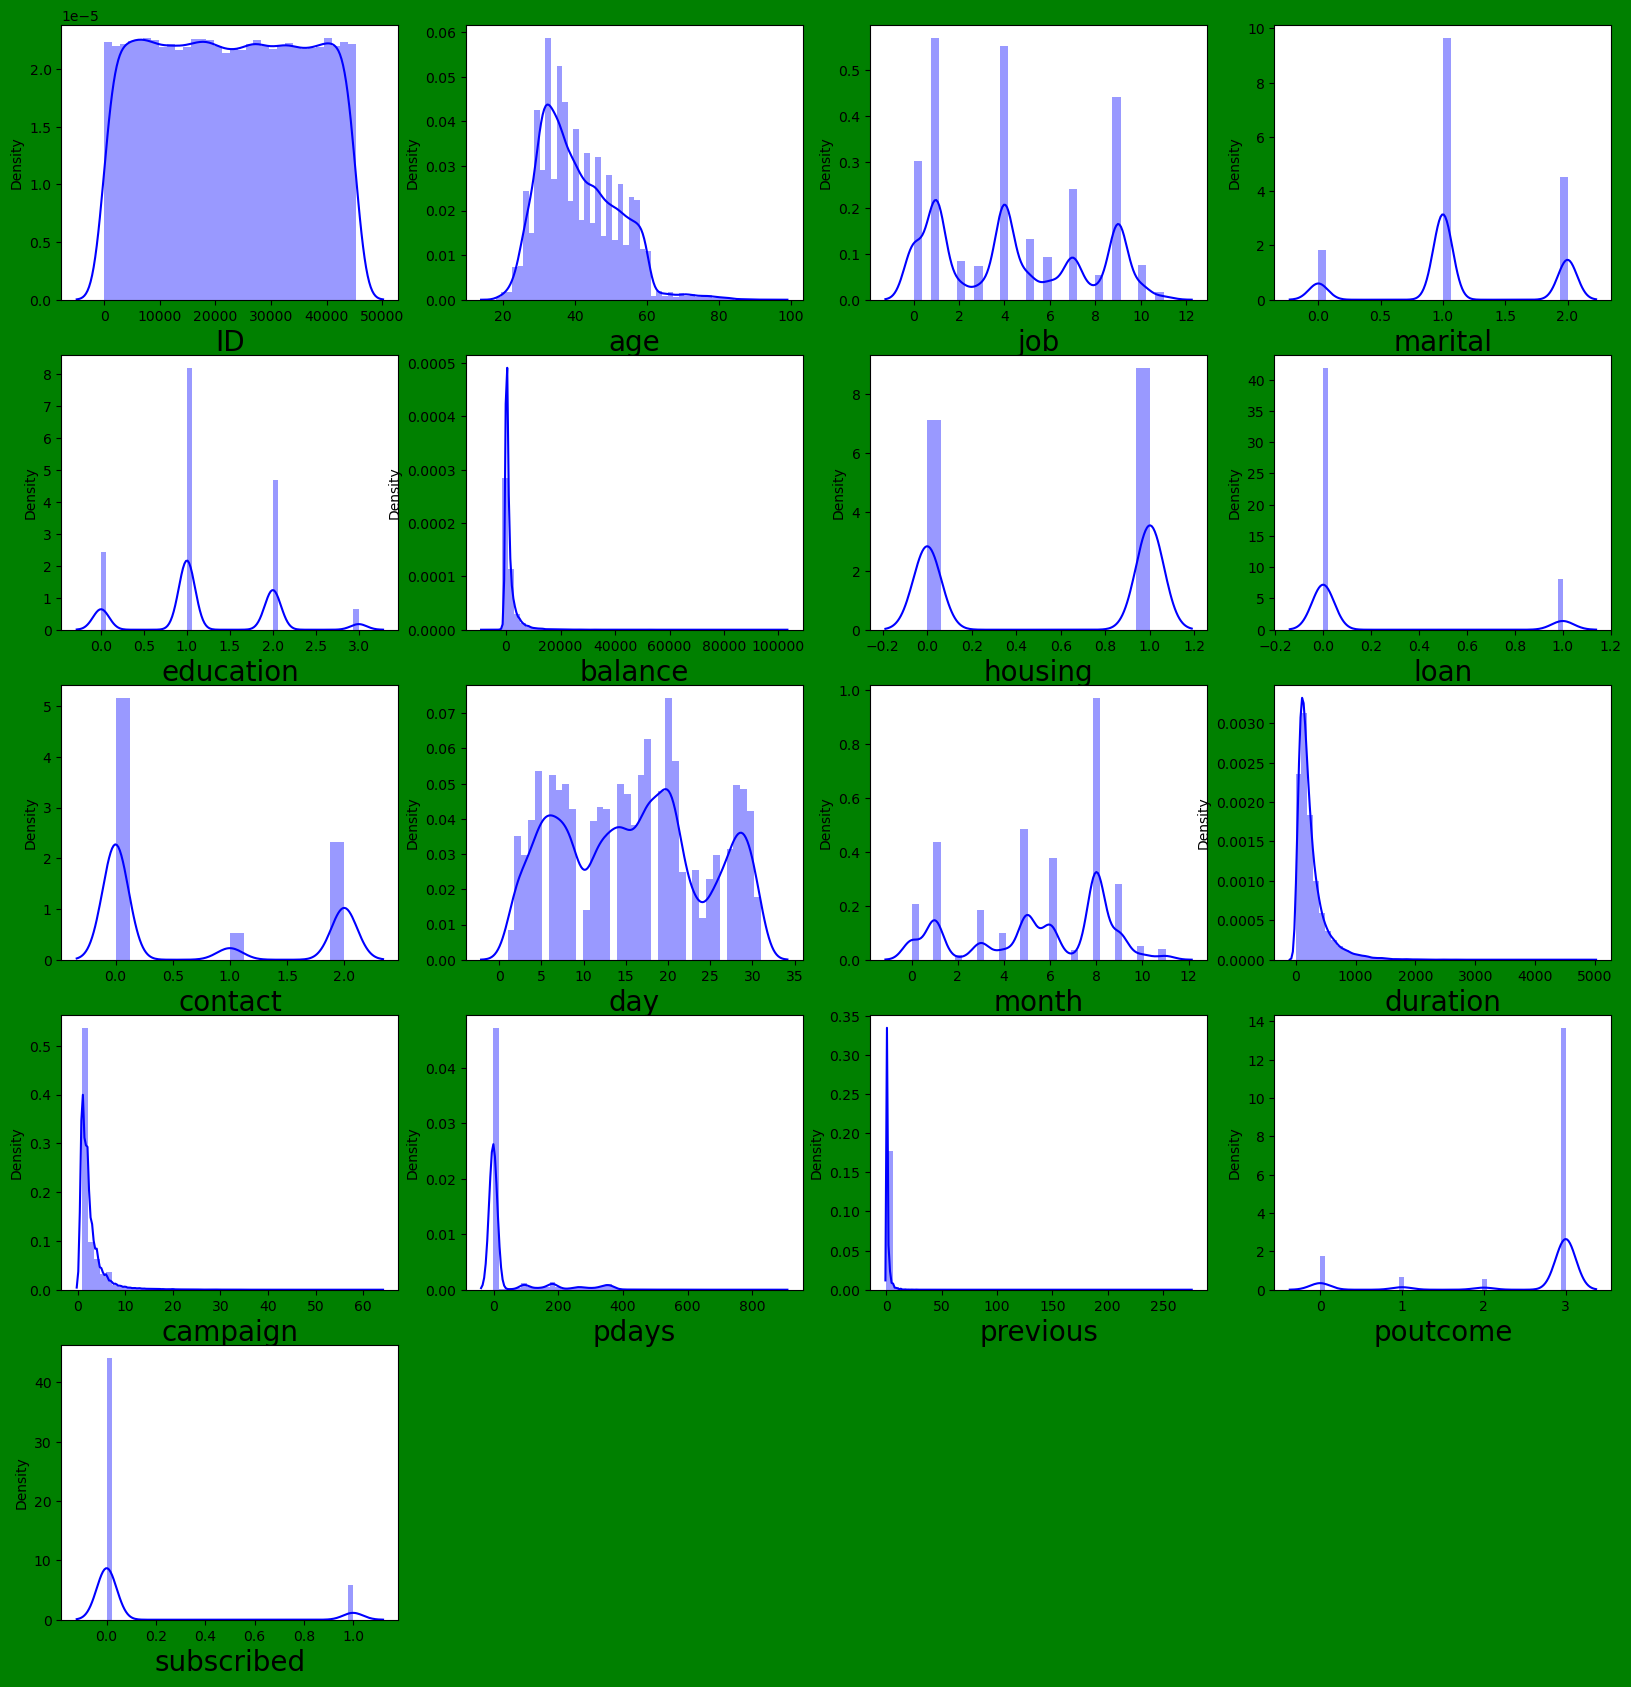

In [71]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df1:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [72]:
df1.skew()

ID            0.079376
age           0.438496
job           0.260890
marital      -0.097176
education     0.199721
balance       2.437605
housing      -0.203589
loan          1.787691
contact       0.694487
day           0.073752
month        -0.471673
duration      1.596552
campaign      2.059359
pdays         2.824483
previous      3.691573
poutcome     -2.473077
subscribed    2.635813
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of subscribed column is 2.377 so the weight in the left tail of the distribution.

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [73]:
#removing skewness using cuberoot method

df1['subscribed']=np.cbrt(df1['subscribed'])


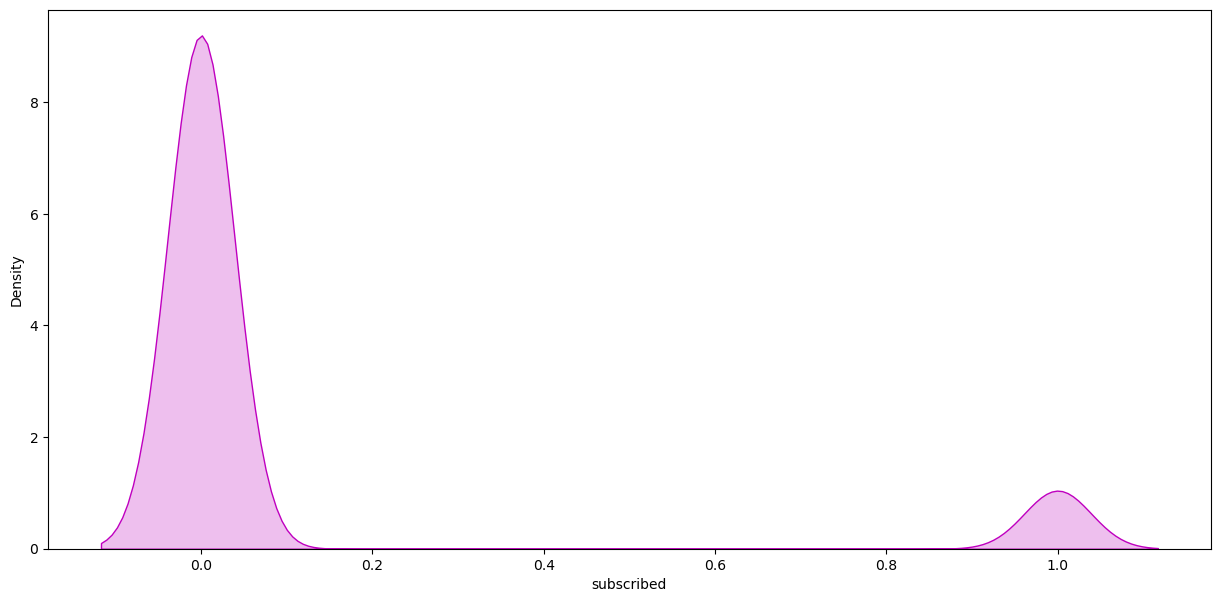

In [74]:
#Let visualize how the data distributed in subscribed after removing skewness

sns.distplot(df1['subscribed'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()


In [75]:
#removing skewness using cuberoot method

df1['duration']=np.cbrt(df1['duration'])


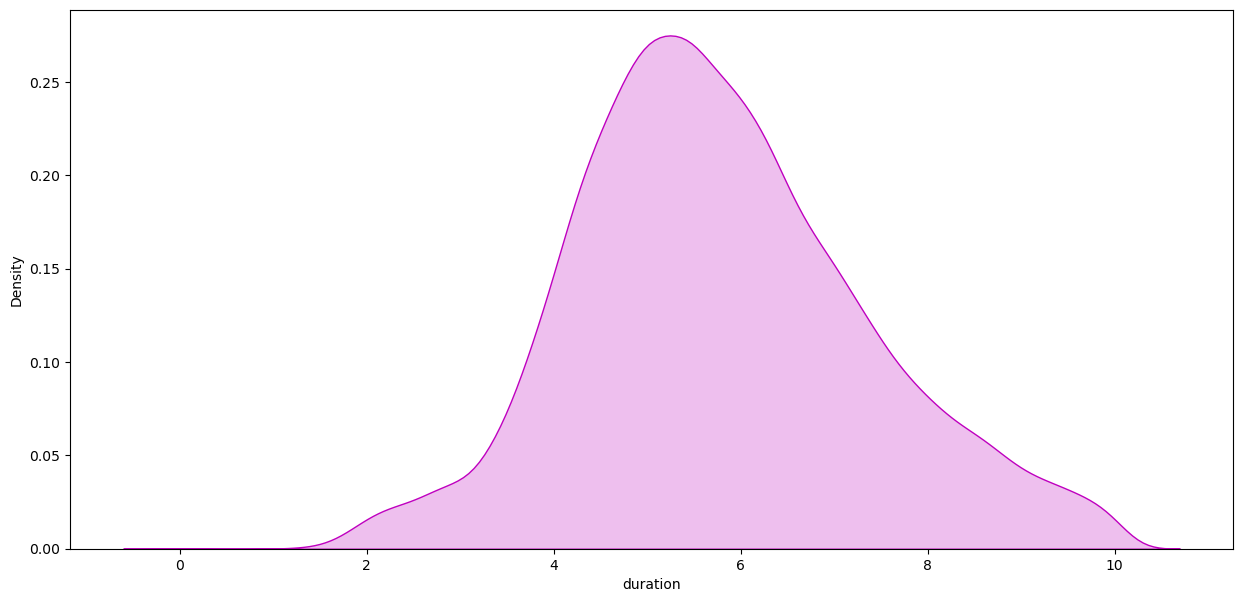

In [76]:
#Let visualize how the data distributed in subscribed after removing skewness

sns.distplot(df1['duration'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()


In [77]:
#removing skewness using cuberoot method

df1['campaign']=np.cbrt(df1['campaign'])

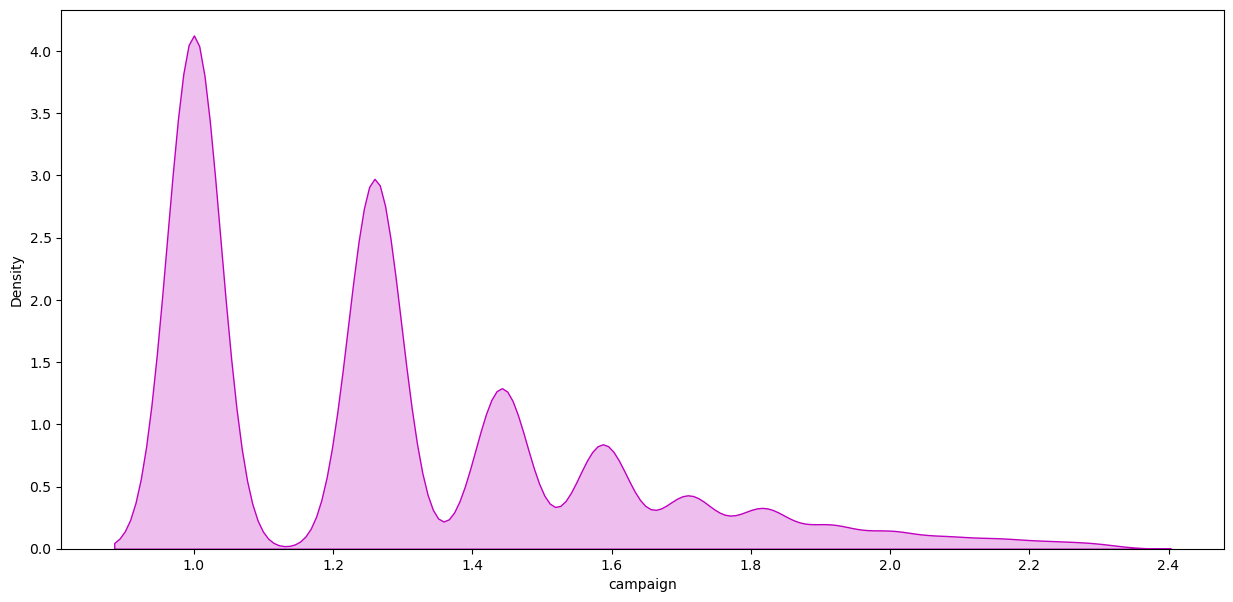

In [78]:
#Let visualize how the data distributed in subscribed after removing skewness

sns.distplot(df1['campaign'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [79]:
#removing skewness using cuberoot method

df1['poutcome']=np.cbrt(df1['poutcome'])


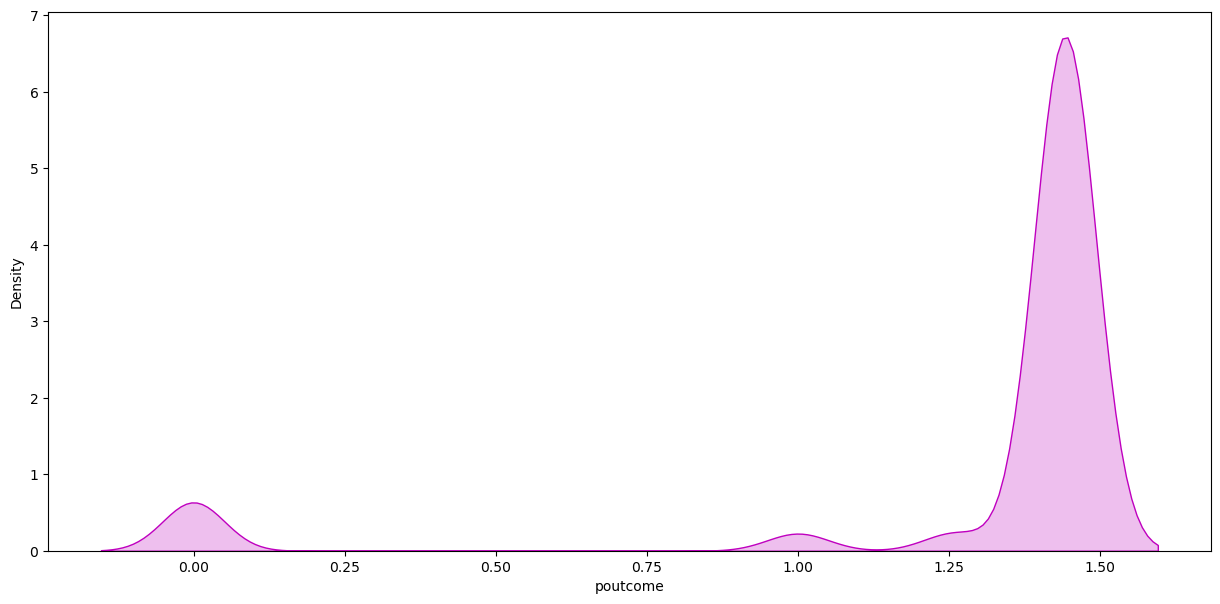

In [80]:
#Let visualize how the data distributed in subscribed after removing skewness

sns.distplot(df1['poutcome'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [81]:
#removing skewness using cuberoot method

df1['pdays']=np.cbrt(df1['pdays'])


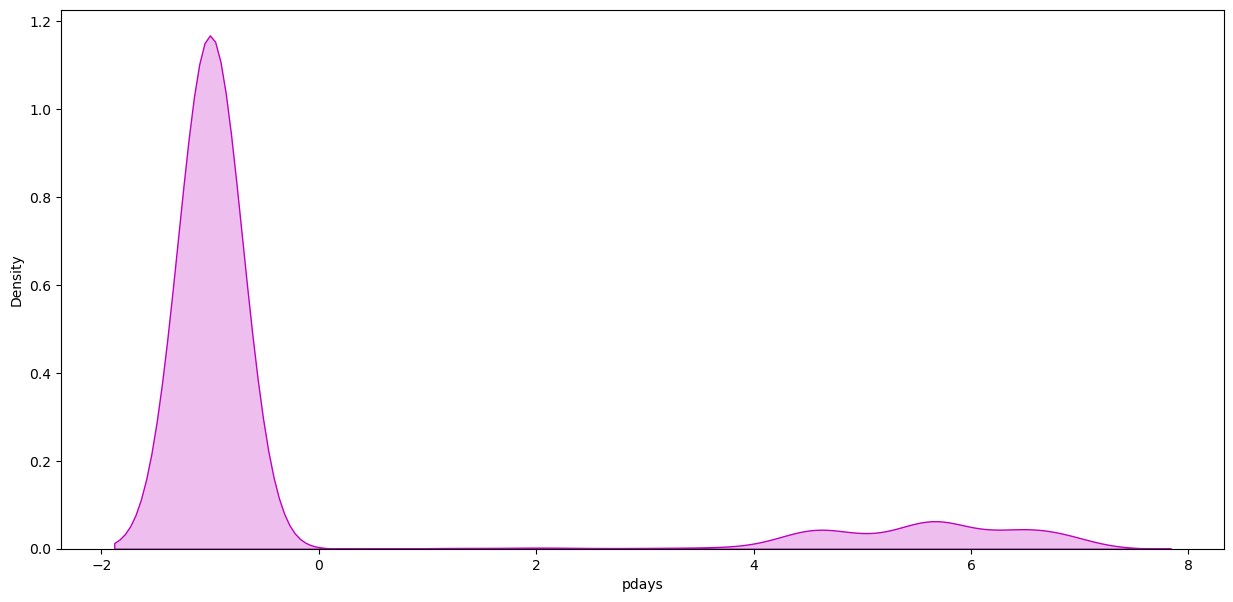

In [82]:
#Let visualize how the data distributed in subscribed after removing skewness

sns.distplot(df1['pdays'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

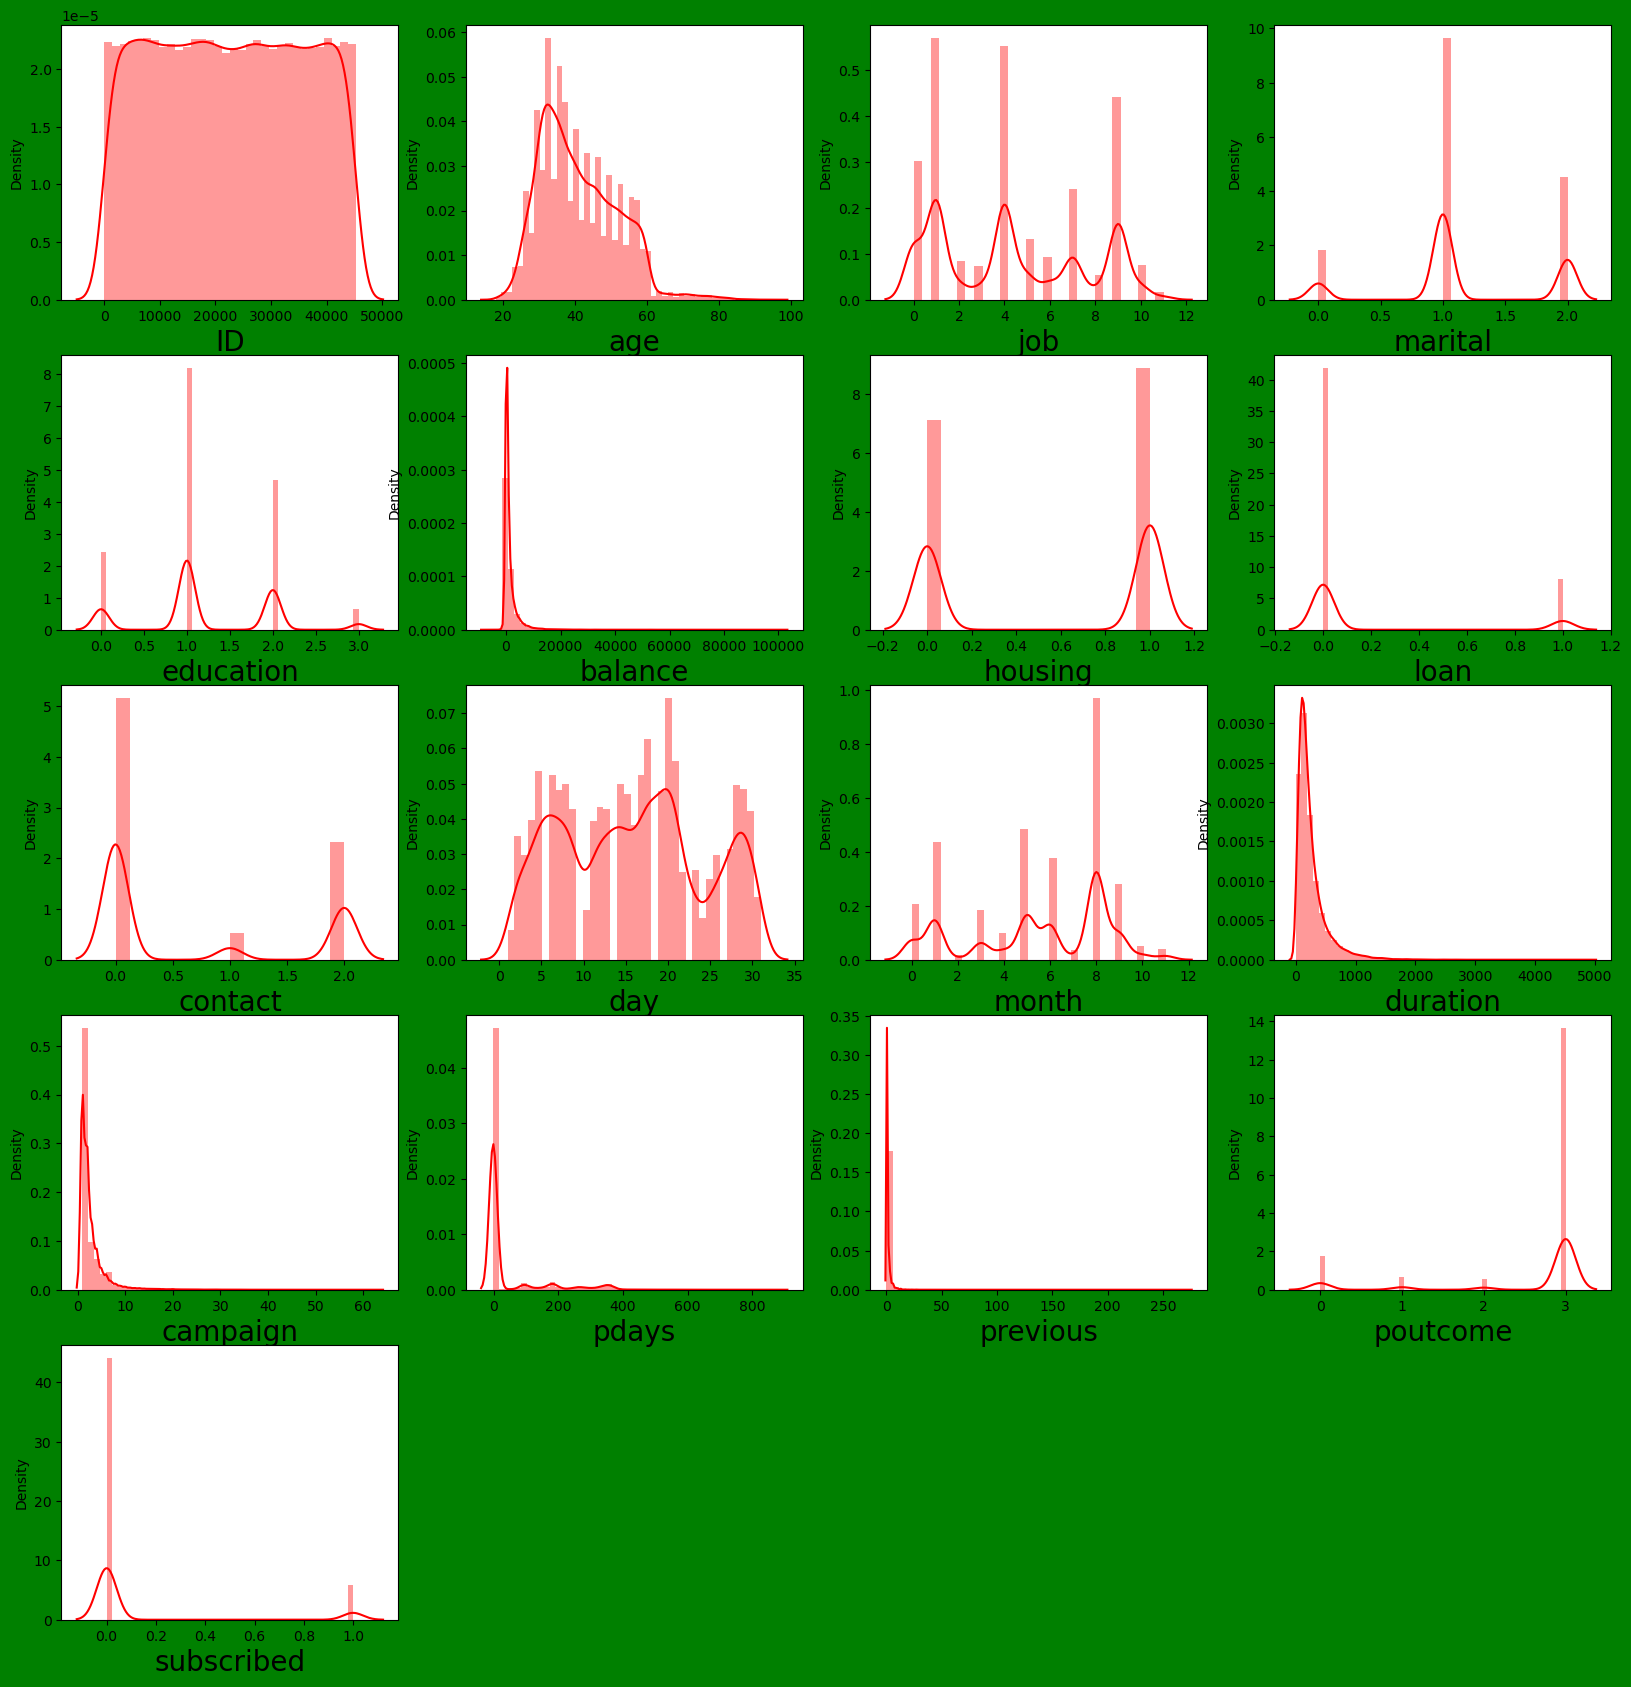

In [83]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df1:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

# Correlation between target variable and independent variables

In [85]:
#Now we will check the correlation target variable and independent variable
df1.corr()

ID       age       job   marital  education   balance  \
ID          1.000000 -0.032493  0.070307  0.099512   0.117570  0.099997   
age        -0.032493  1.000000 -0.030552 -0.411087  -0.100363  0.093000   
job         0.070307 -0.030552  1.000000  0.067076   0.169526  0.024371   
marital     0.099512 -0.411087  0.067076  1.000000   0.109940  0.012026   
education   0.117570 -0.100363  0.169526  0.109940   1.000000  0.052416   
balance     0.099997  0.093000  0.024371  0.012026   0.052416  1.000000   
housing    -0.202757 -0.155557 -0.122764 -0.026593  -0.096581 -0.055898   
loan       -0.079225  0.005488 -0.038629 -0.045159  -0.047982 -0.100916   
contact    -0.734588  0.029036 -0.084375 -0.042070  -0.121975 -0.039168   
day        -0.047549 -0.009937  0.020514 -0.008386   0.017677  0.008030   
month      -0.207484 -0.042070 -0.088359 -0.003321  -0.056416  0.030123   
duration    0.009435 -0.031297 -0.003418  0.016357   0.002066  0.027084   
campaign   -0.093880  0.040856  0.007853 -0.030809  -0.009684 -0.015639   
pdays       0.425719 -0.004609  0.012431  0.021377   0.048220  0.061699   
previous    0.371199  0.007225  0.012878  0.019110   0.043542  0.053219   
poutcome   -0.334102 -0.000994 -0.008533 -0.008662  -0.031622 -0.054174   
subscribed  0.312156 -0.007172  0.036743  0.056387   0.075838  0.070595   

             housing      loan   contact       day     month  duration  \
ID         -0.202757 -0.079225 -0.734588 -0.047549 -0.207484  0.009435   
age        -0.155557  0.005488  0.029036 -0.009937 -0.042070 -0.031297   
job        -0.122764 -0.038629 -0.084375  0.020514 -0.088359 -0.003418   
marital    -0.026593 -0.045159 -0.042070 -0.008386 -0.003321  0.016357   
education  -0.096581 -0.047982 -0.121975  0.017677 -0.056416  0.002066   
balance    -0.055898 -0.100916 -0.039168  0.008030  0.030123  0.027084   
housing     1.000000  0.031251  0.215776 -0.015138  0.274293  0.011891   
loan        0.031251  1.000000 -0.012620  0.011949  0.026898 -0.006263   
contact     0.215776 -0.012620  1.000000 -0.030543  0.392662 -0.034850   
day        -0.015138  0.011949 -0.030543  1.000000  0.017204 -0.039272   
month       0.274293  0.026898  0.392662  0.017204  1.000000  0.003313   
duration    0.011891 -0.006263 -0.034850 -0.039272  0.003313  1.000000   
campaign   -0.043774 -0.001319 -0.001789  0.132730 -0.132335 -0.103925   
pdays       0.033460 -0.014711 -0.261336 -0.051627 -0.029899  0.025988   
previous    0.008041 -0.016997 -0.214404 -0.049292 -0.007691  0.025594   
poutcome   -0.062177 -0.004912  0.224936  0.041980  0.019101  0.000898   
subscribed -0.145640 -0.074803 -0.158031 -0.030122 -0.022564  0.328075   

            campaign     pdays  previous  poutcome  subscribed  
ID         -0.093880  0.425719  0.371199 -0.334102    0.312156  
age         0.040856 -0.004609  0.007225 -0.000994   -0.007172  
job         0.007853  0.012431  0.012878 -0.008533    0.036743  
marital    -0.030809  0.021377  0.019110 -0.008662    0.056387  
education  -0.009684  0.048220  0.043542 -0.031622    0.075838  
balance    -0.015639  0.061699  0.053219 -0.054174    0.070595  
housing    -0.043774  0.033460  0.008041 -0.062177   -0.145640  
loan       -0.001319 -0.014711 -0.016997 -0.004912   -0.074803  
contact    -0.001789 -0.261336 -0.214404  0.224936   -0.158031  
day         0.132730 -0.051627 -0.049292  0.041980   -0.030122  
month      -0.132335 -0.029899 -0.007691  0.019101   -0.022564  
duration   -0.103925  0.025988  0.025594  0.000898    0.328075  
campaign    1.000000 -0.105927 -0.066264  0.097189   -0.081699  
pdays      -0.105927  1.000000  0.802449 -0.854418    0.167936  
previous   -0.066264  0.802449  1.000000 -0.676533    0.174095  
poutcome    0.097189 -0.854418 -0.676533  1.000000   -0.048104  
subscribed -0.081699  0.167936  0.174095 -0.048104    1.000000

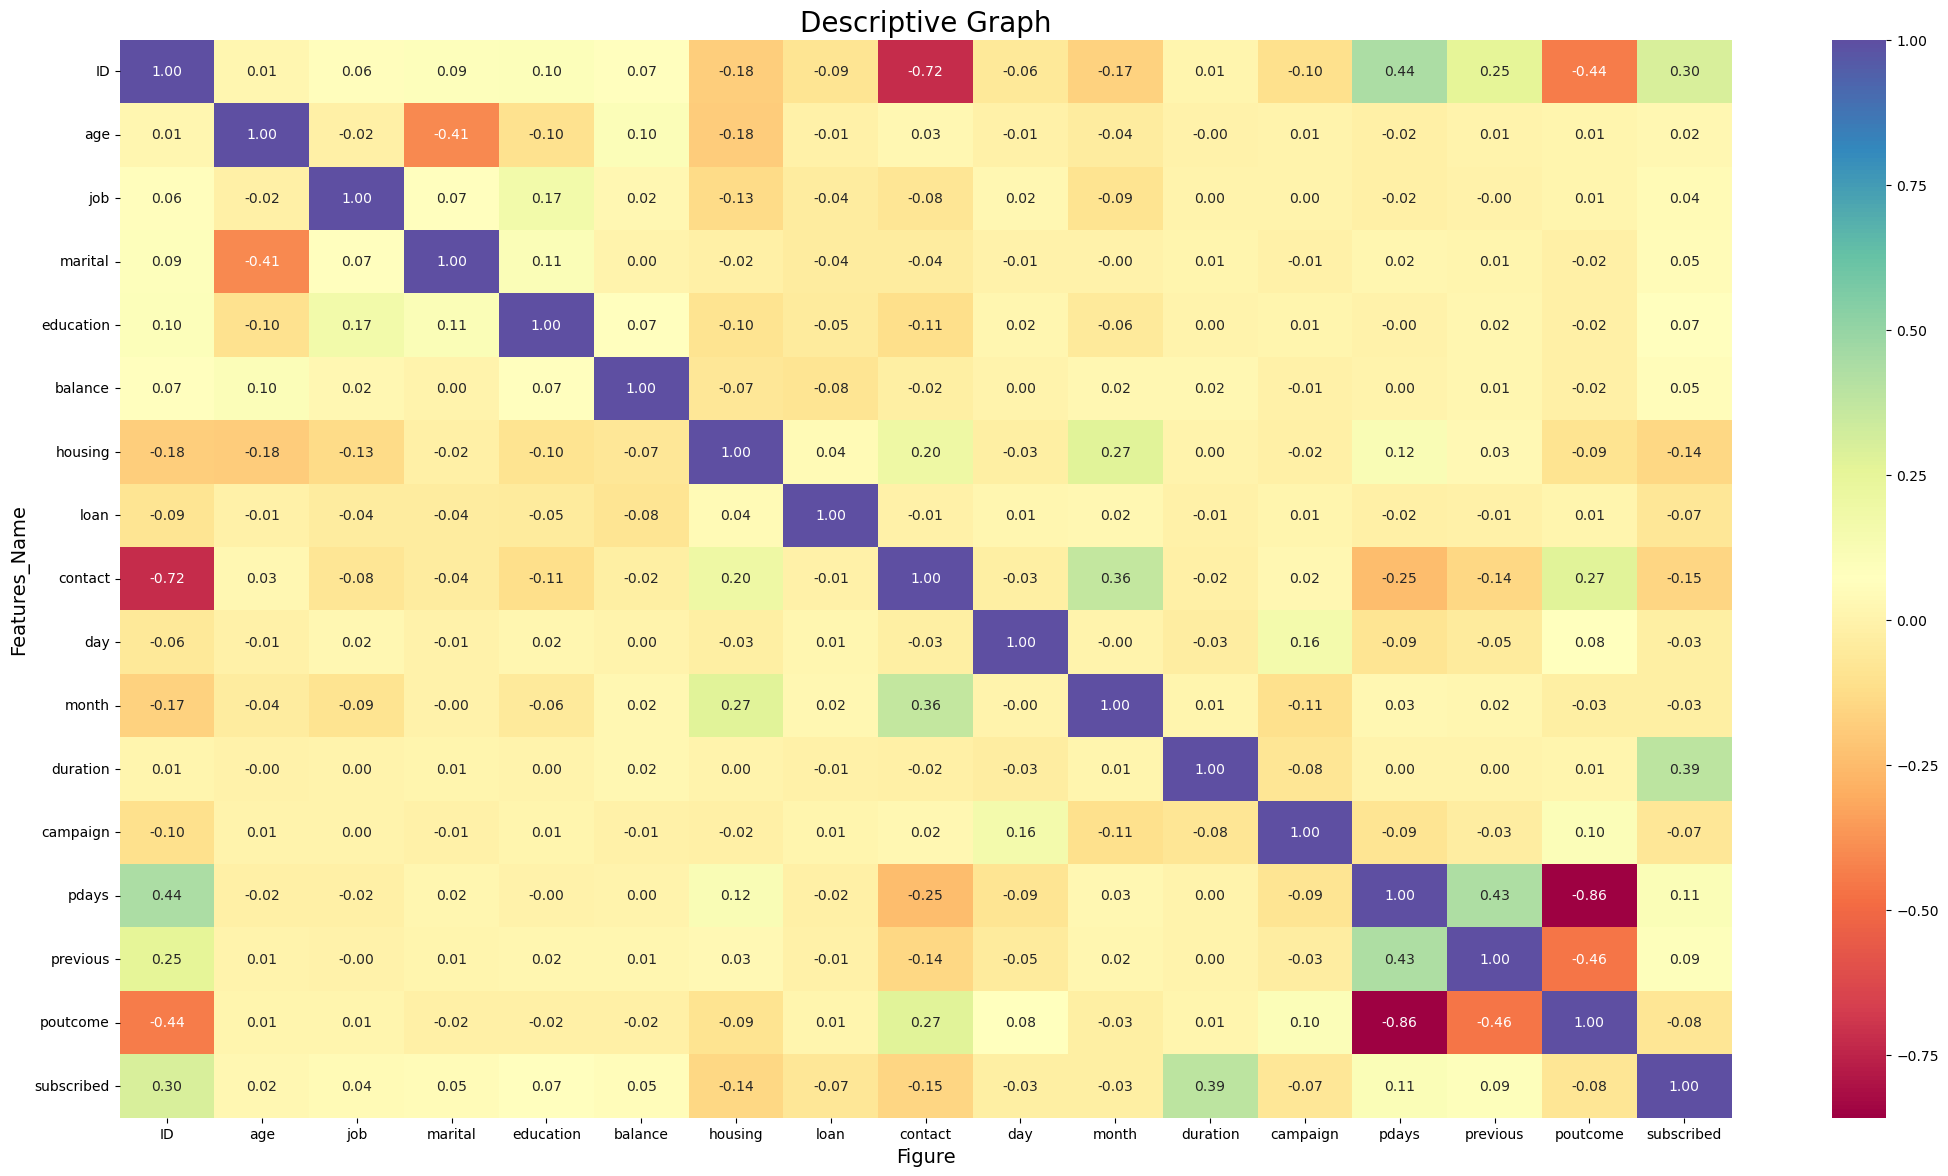

In [86]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [87]:
df1.corr()['subscribed'].sort_values()

contact      -0.158031
housing      -0.145640
campaign     -0.081699
loan         -0.074803
poutcome     -0.048104
day          -0.030122
month        -0.022564
age          -0.007172
job           0.036743
marital       0.056387
balance       0.070595
education     0.075838
pdays         0.167936
previous      0.174095
ID            0.312156
duration      0.328075
subscribed    1.000000
Name: subscribed, dtype: float64

# ## Visualizing the correlation between label and features using bar plot 


In [88]:
df1=df1.drop('ID',axis=True)

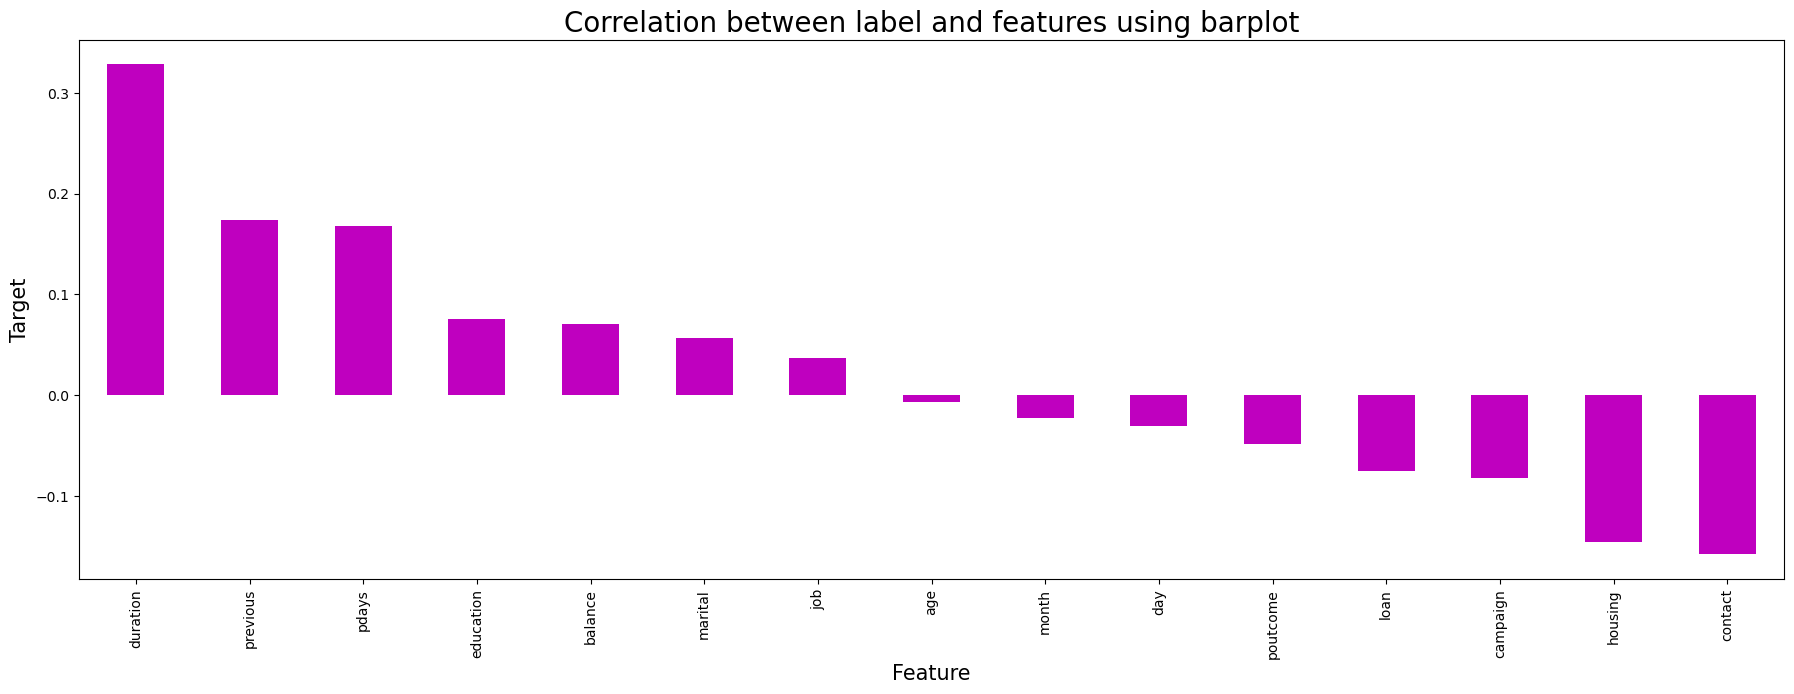

In [89]:
plt.figure(figsize = (22,7))
df1.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color ="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

## Seperating features and label


In [90]:
#Seperating the independent and target variables into x and y
x = df1.drop(["subscribed","age","month","day"],axis=1)
y = df1["subscribed"].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (28124, 12)
Label Dimension (28124,)


# ## Feature Scaling using Standard Scalarization


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

job   marital  education   balance   housing      loan   contact  \
0     -1.321707 -0.276906   2.376931  0.494277 -1.106956 -0.447423  0.359876   
1      2.023504 -0.276906  -0.301360 -0.628157 -1.106956 -0.447423 -0.735486   
2      0.807064 -0.276906  -0.301360 -0.111721  0.903378 -0.447423 -0.735486   
3     -0.105266 -1.927894   1.037785  1.281726 -1.106956 -0.447423 -0.735486   
4      1.415284 -0.276906  -0.301360 -0.560694  0.903378 -0.447423 -0.735486   
...         ...       ...        ...       ...       ...       ...       ...   
28119 -0.105266  1.374081  -0.301360  1.096204 -1.106956 -0.447423  1.455237   
28120  1.415284  1.374081   1.037785  0.131376 -1.106956 -0.447423  1.455237   
28121 -0.105266  1.374081   1.037785 -0.629901  0.903378 -0.447423 -0.735486   
28122 -0.105266 -1.927894   1.037785 -0.408904 -1.106956  2.235019 -0.735486   
28123 -0.105266  1.374081   1.037785 -0.448451 -1.106956 -0.447423 -0.735486   

       duration  campaign     pdays  previous  poutcome  
0     -1.435964 -0.066617 -0.397003 -0.330792  0.340668  
1     -0.816377 -0.066617 -0.397003 -0.330792  0.340668  
2      0.282780 -0.946471 -0.397003 -0.330792  0.340668  
3      2.409314 -0.946471  1.961651  2.536730 -0.119758  
4      0.941491 -0.946471 -0.397003 -0.330792  0.340668  
...         ...       ...       ...       ...       ...  
28119 -1.706902  1.041930 -0.397003 -0.330792  0.340668  
28120  1.181141 -0.066617 -0.397003 -0.330792  0.340668  
28121 -0.573652 -0.066617 -0.397003 -0.330792  0.340668  
28122  1.166382 -0.066617 -0.397003 -0.330792  0.340668  
28123 -1.562832  0.550580 -0.397003 -0.330792  0.340668  

[28124 rows x 12 columns]

### Checking Variance Inflation Factor(VIF)


In [92]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values   Features
0     1.047127        job
1     1.018376    marital
2     1.059080  education
3     1.019759    balance
4     1.084834    housing
5     1.017028       loan
6     1.151197    contact
7     1.015628   duration
8     1.026522   campaign
9     5.742216      pdays
10    2.816381   previous
11    3.737941   poutcome

In [93]:
#Again checking VIF value to confirm whether the multicollinearity still exists

vif = pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Freatures"]=x.columns
vif


VIF values  Freatures
0     1.047127        job
1     1.018376    marital
2     1.059080  education
3     1.019759    balance
4     1.084834    housing
5     1.017028       loan
6     1.151197    contact
7     1.015628   duration
8     1.026522   campaign
9     5.742216      pdays
10    2.816381   previous
11    3.737941   poutcome

# Modeling

In [94]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Creating train test split

In [103]:
from sklearn.model_selection import train_test_split


In [ ]:
#finding the best Random state, we are using regression 

maxAcc = 0
maxRS = 0
for i in range(1,28124):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAcc, "at random_state",maxRS)

# Random Forest Classifier

In [106]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9034276774285308
[[6143  152]
 [ 527  209]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6295
           1       0.58      0.28      0.38       736

    accuracy                           0.90      7031
   macro avg       0.75      0.63      0.66      7031
weighted avg       0.89      0.90      0.89      7031



# Logistic Regression

In [107]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9031432228701465
[[6171  124]
 [ 557  179]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6295
           1       0.59      0.24      0.34       736

    accuracy                           0.90      7031
   macro avg       0.75      0.61      0.65      7031
weighted avg       0.88      0.90      0.88      7031



# SV Machine classifier

In [108]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9054188593372209
[[6238   57]
 [ 608  128]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6295
           1       0.69      0.17      0.28       736

    accuracy                           0.91      7031
   macro avg       0.80      0.58      0.61      7031
weighted avg       0.89      0.91      0.88      7031



# Bagging Classifier

In [158]:
#checking accuracy for Bagging classifier

BC =BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))


0.8995022517184167
[[7353  232]
 [ 616  237]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7585
           1       0.51      0.28      0.36       853

    accuracy                           0.90      8438
   macro avg       0.71      0.62      0.65      8438
weighted avg       0.88      0.90      0.89      8438



# Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [ ]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value  1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafulat scoring parameter is - r2 score


In [110]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())


[0.9088     0.90951111 0.90577778 0.91057778 0.90842817]
0.9086189663347557
Difference between Accuracy score and cross validation score is - -0.005191288906224889


In [111]:
#Checking cv score for Logistic Regression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())


[0.904      0.90951111 0.9072     0.90542222 0.9071835 ]
0.9066633665244191
Difference between Accuracy score and cross validation score is - -0.003520143654272667


In [113]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predsvc)-score.mean())


[0.90631111 0.9104     0.90613333 0.90755556 0.91073969]
0.9082279374110953
Difference between Accuracy score and cross validation score is - -0.002809078073874427


# # Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [115]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [119]:
Final_model = SVC(C=1.0, kernel='rbf')
Final_model.fit(x_train, y_train)
predictions = Final_model.predict(x_test)
predictions
acc = r2_score(y_test,pred)
print(acc*100)

-3.345283523845688


# saving the model


In [117]:
import joblib
joblib.dump(Final_model,"Bank_marketing.pkl")

['Bank_marketing.pkl']

In [ ]:
#Lets load the saved model and get the prediction

# Load the test data
test_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

#Prediction
prediction = Final_model.predict(test_data)
prediction
